In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
%matplotlib inline

In [2]:
resp = requests.get('https://www.worldometers.info/coronavirus/country/us/')
dfs = pd.read_html(resp.text)

In [3]:
len(dfs)

9

In [4]:
us_df = pd.read_csv('https://raw.githubusercontent.com/nytimes/covid-19-data/master/us.csv')

In [5]:
us_df['daily_cases'] = us_df['cases']-us_df['cases'].shift()
us_df['daily_deaths'] = us_df['deaths']-us_df['deaths'].shift()

In [6]:
us_df.tail()

,date,cases,deaths,daily_cases,daily_deaths
125,2020-05-25,1670101,98190,19097.0,510.0
126,2020-05-26,1688990,98937,18889.0,747.0
127,2020-05-27,1707699,100422,18709.0,1485.0
128,2020-05-28,1730158,101622,22459.0,1200.0
129,2020-05-29,1754724,102812,24566.0,1190.0


In [7]:
# states_df = tates_df.merge(\
#                 (pd.pivot_table(states_df,values='cases',index = 'date', columns='state').fillna(0)-\
#                  pd.pivot_table(states_df,values='cases',index = 'date', columns='state').fillna(0).shift()).stack().reset_index(),\
#                 how = 'left',on=['date','state']).rename(columns={0:'daily_new_cases'})

In [8]:
states_df = pd.read_csv('https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-states.csv')

In [9]:
states_df = states_df.merge(\
                (pd.pivot_table(states_df,values='cases',index = 'date', columns='state').fillna(0)-\
                 pd.pivot_table(states_df,values='cases',index = 'date', columns='state').fillna(0).shift()).stack().reset_index(),\
                how = 'left',on=['date','state']).rename(columns={0:'daily_new_cases'})

In [10]:
states_df = states_df.merge(\
                (pd.pivot_table(states_df,values='deaths',index = 'date', columns='state').fillna(0)-\
                 pd.pivot_table(states_df,values='deaths',index = 'date', columns='state').fillna(0).shift()).stack().reset_index(),\
                how = 'left',on=['date','state']).rename(columns={0:'daily_new_deaths'})

In [11]:
states_df = states_df.merge(\
                (pd.pivot_table(states_df,values='deaths',index = 'date', columns='state').fillna(0)-\
                 pd.pivot_table(states_df,values='deaths',index = 'date', columns='state').fillna(0).shift(7)).stack().reset_index(),\
                how = 'left',on=['date','state']).rename(columns={0:'deaths_last_7'})

In [12]:
states_df = states_df.merge(\
                (pd.pivot_table(states_df,values='cases',index = 'date', columns='state').fillna(0)-\
                 pd.pivot_table(states_df,values='cases',index = 'date', columns='state').fillna(0).shift(7)).stack().reset_index(),\
                how = 'left',on=['date','state']).rename(columns={0:'cases_last_7'})

In [13]:
states_df = states_df.merge(\
                (pd.pivot_table(states_df,values='cases',index = 'date', columns='state').fillna(0)-\
                 pd.pivot_table(states_df,values='cases',index = 'date', columns='state').fillna(0).shift(14)).stack().reset_index(),\
                how = 'left',on=['date','state']).rename(columns={0:'cases_last_14'})

In [14]:
states_df = states_df.merge(\
                (pd.pivot_table(states_df,values='deaths',index = 'date', columns='state').fillna(0)-\
                 pd.pivot_table(states_df,values='deaths',index = 'date', columns='state').fillna(0).shift(14)).stack().reset_index(),\
                how = 'left',on=['date','state']).rename(columns={0:'deaths_last_14'})

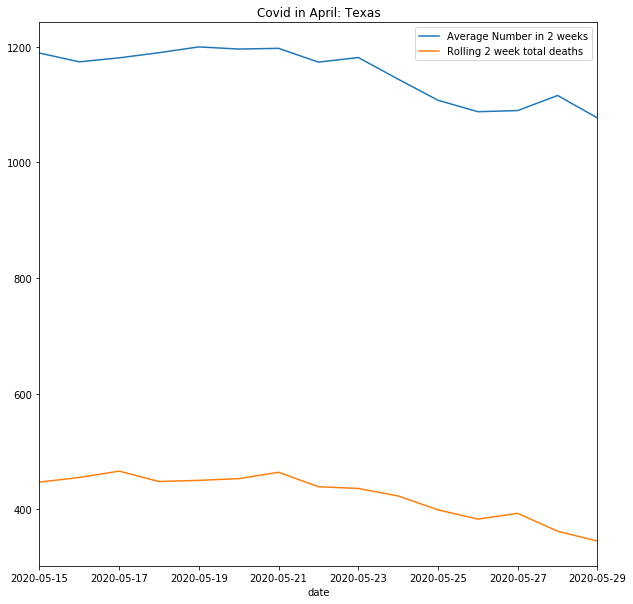

In [15]:
def plot_covid_lag(state):

    fig,ax = plt.subplots(figsize=(10,10))
    (states_df.loc[states_df['state']==state].set_index('date')['cases_last_14']/14).iloc[-15:].plot(ax=ax,label="Average Number in 2 weeks")
    (states_df.loc[states_df['state']==state].set_index('date')['deaths_last_14']).iloc[-15:].plot(ax=ax, label = "Rolling 2 week total deaths")
    ax.set_title("Covid in April: {}".format(state))
    ax.legend()
plot_covid_lag('Texas')

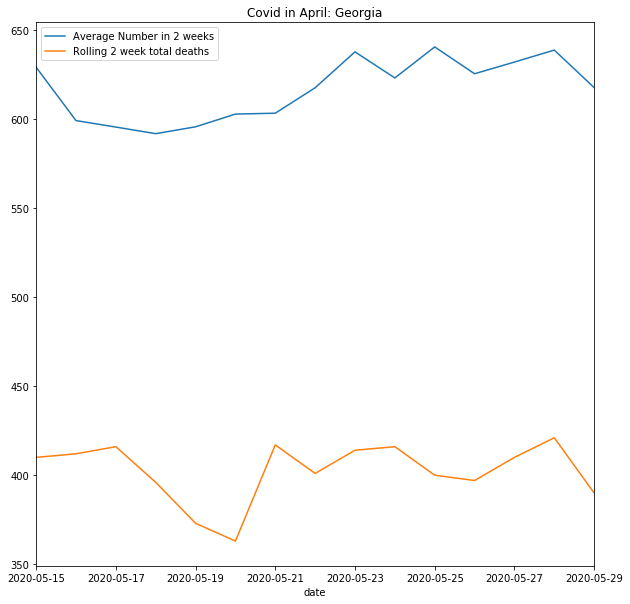

In [16]:
plot_covid_lag('Georgia')

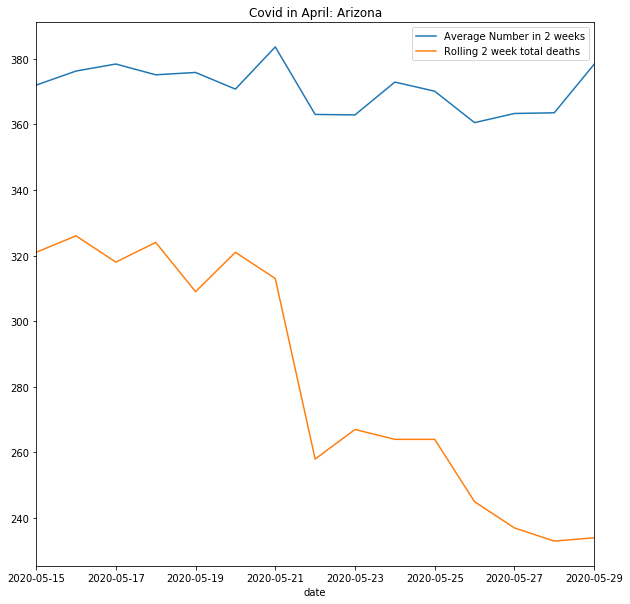

In [17]:

plot_covid_lag('Arizona')

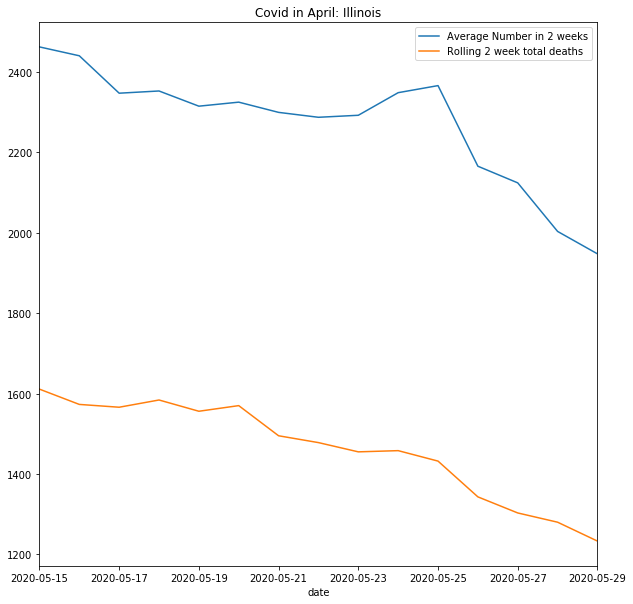

In [18]:



plot_covid_lag('Illinois')

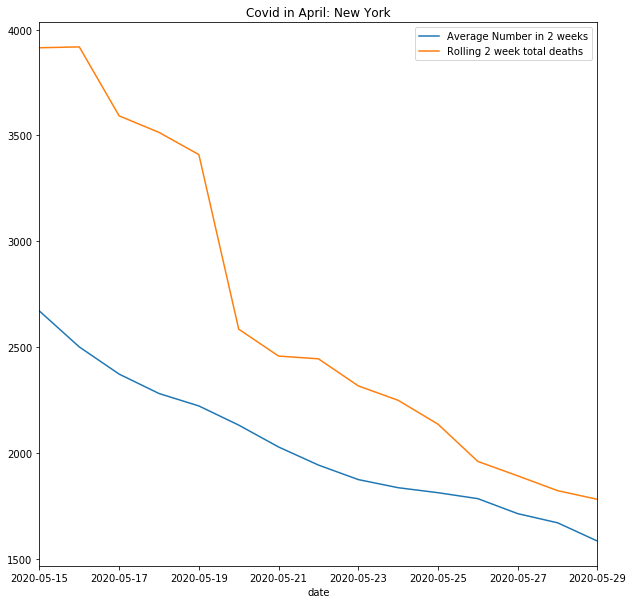

In [19]:
plot_covid_lag('New York')

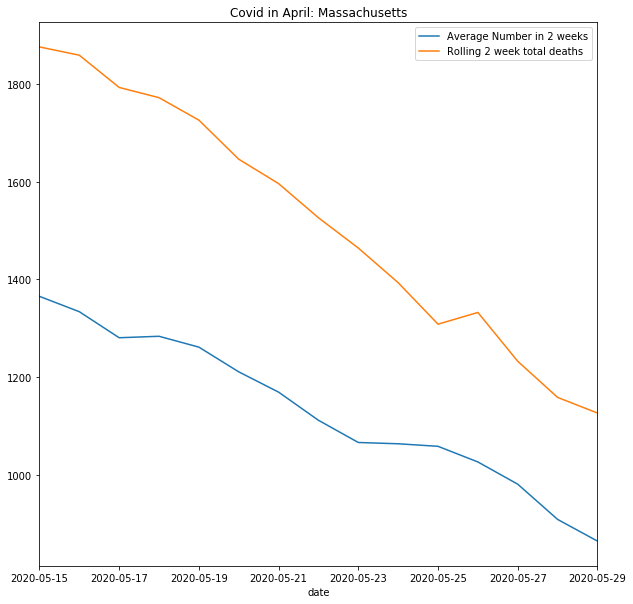

In [20]:
plot_covid_lag('Massachusetts')

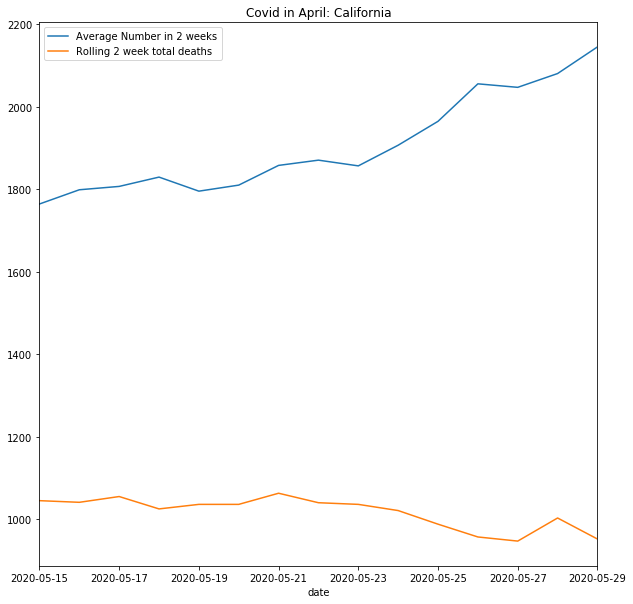

In [21]:
plot_covid_lag('California')

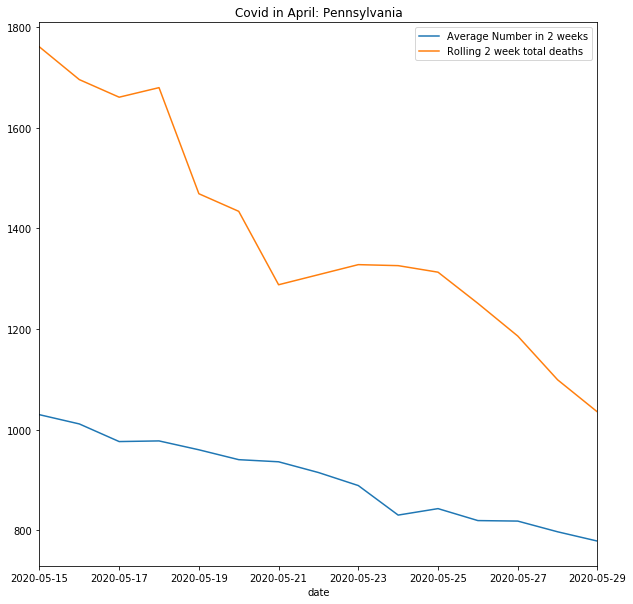

In [22]:
plot_covid_lag('Pennsylvania')

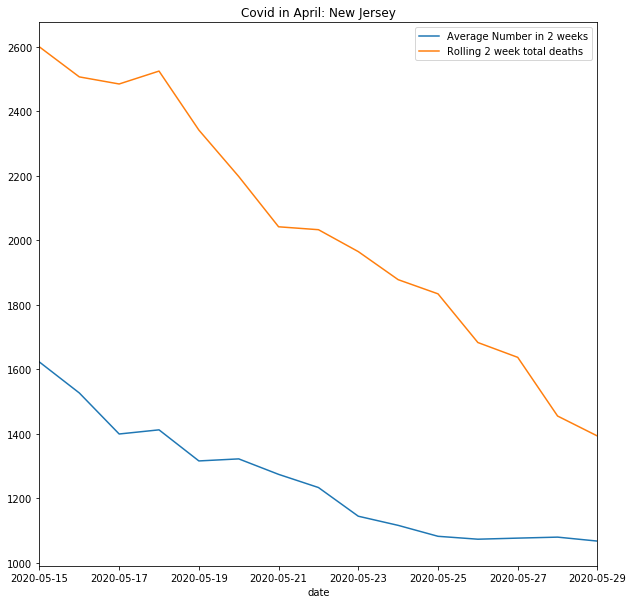

In [23]:
plot_covid_lag('New Jersey')

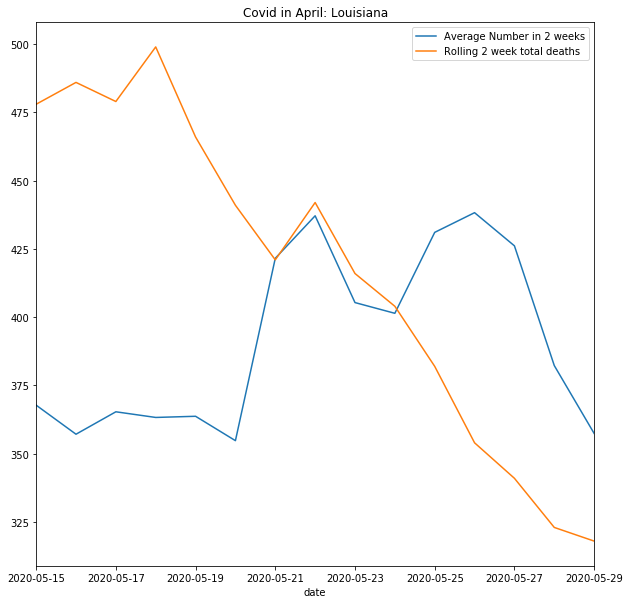

In [24]:
plot_covid_lag('Louisiana')

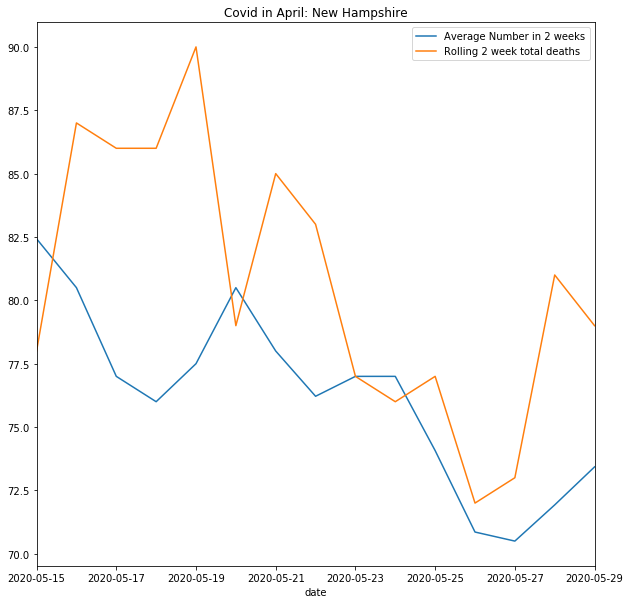

In [25]:
plot_covid_lag('New Hampshire')

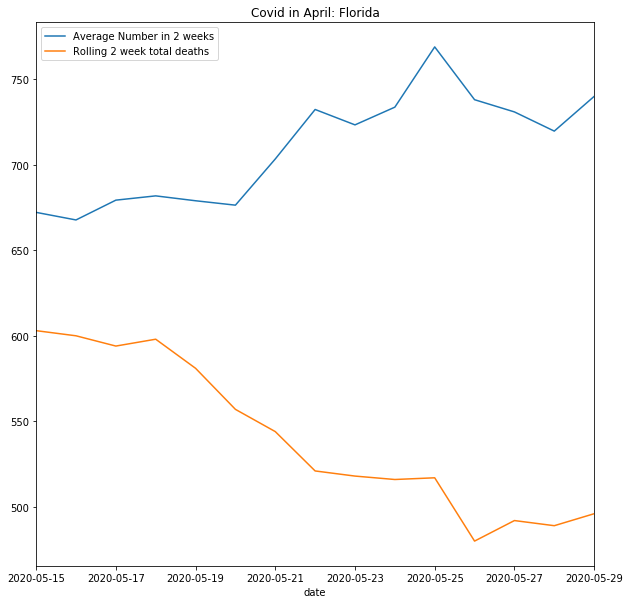

In [26]:
plot_covid_lag('Florida')

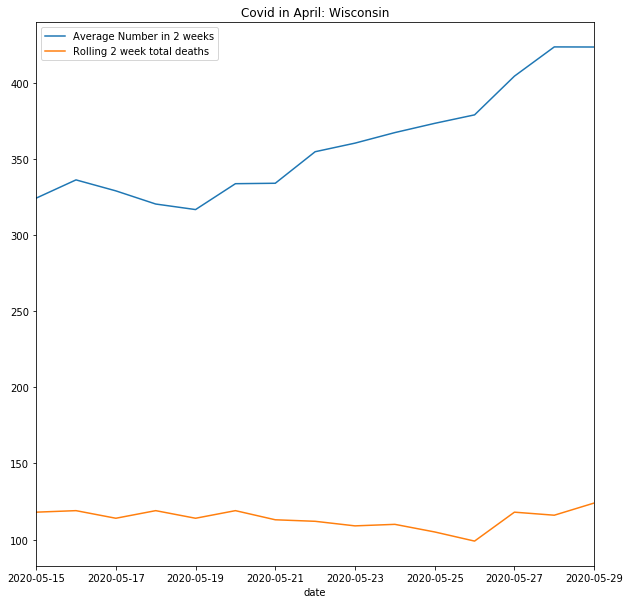

In [27]:
plot_covid_lag('Wisconsin')

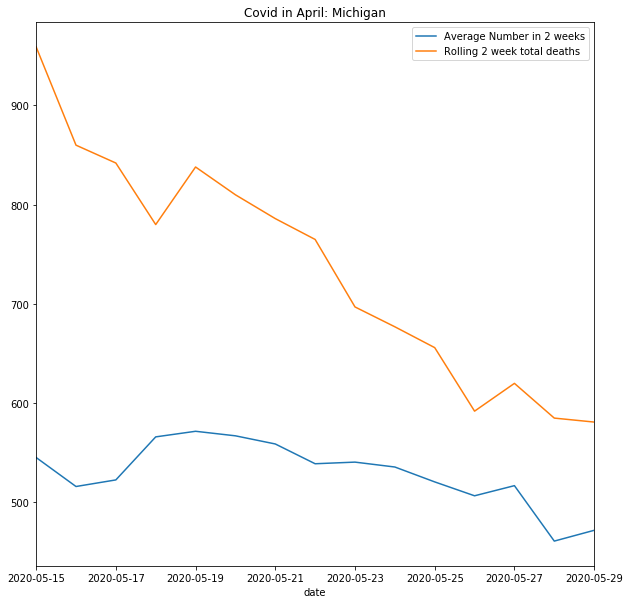

In [28]:
plot_covid_lag('Michigan')

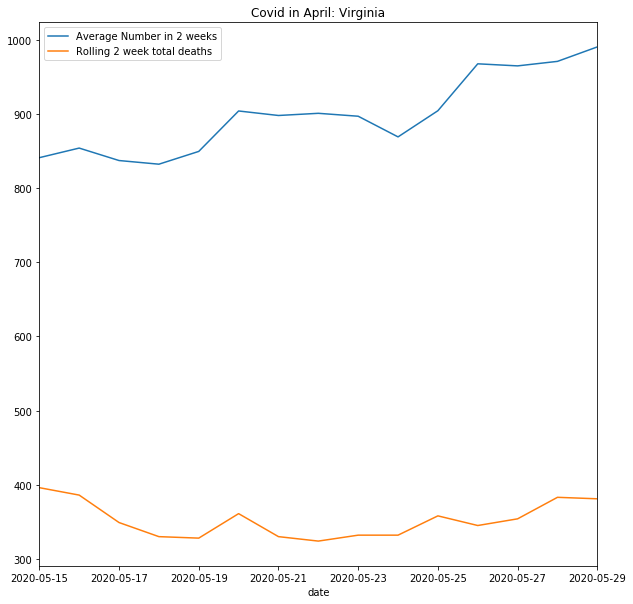

In [29]:
plot_covid_lag('Virginia')

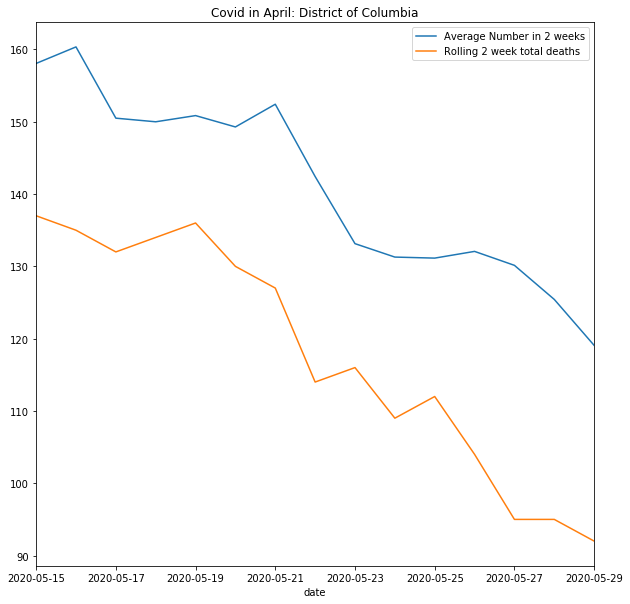

In [30]:
plot_covid_lag('District of Columbia')

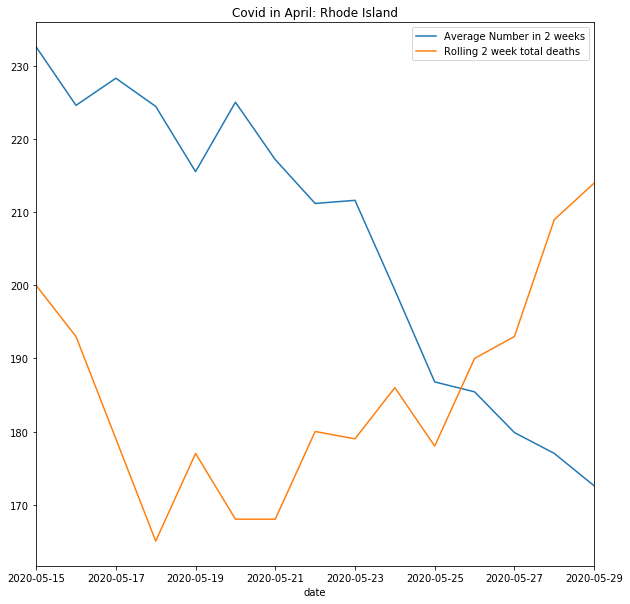

In [31]:
plot_covid_lag('Rhode Island')

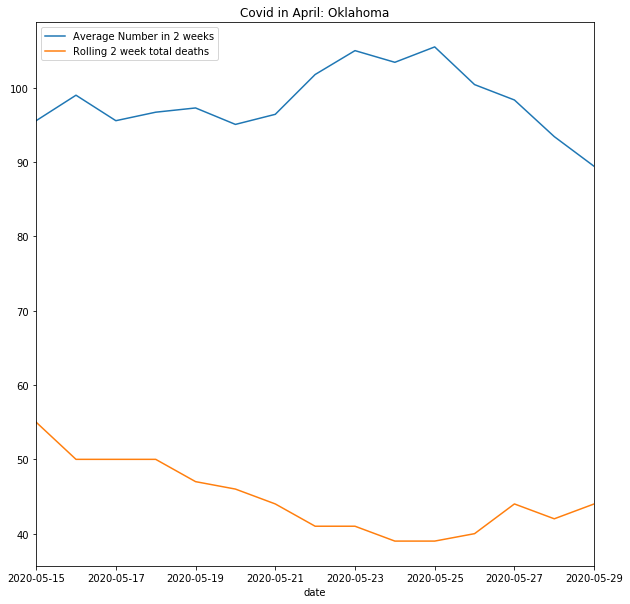

In [32]:
plot_covid_lag('Oklahoma')

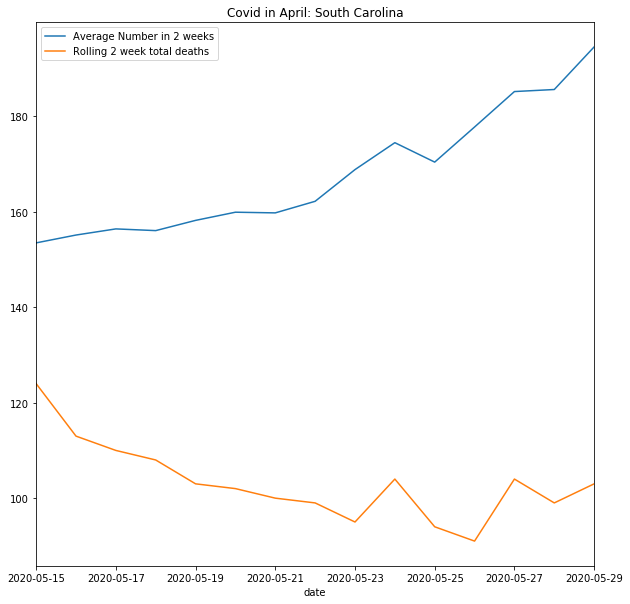

In [33]:
plot_covid_lag('South Carolina')

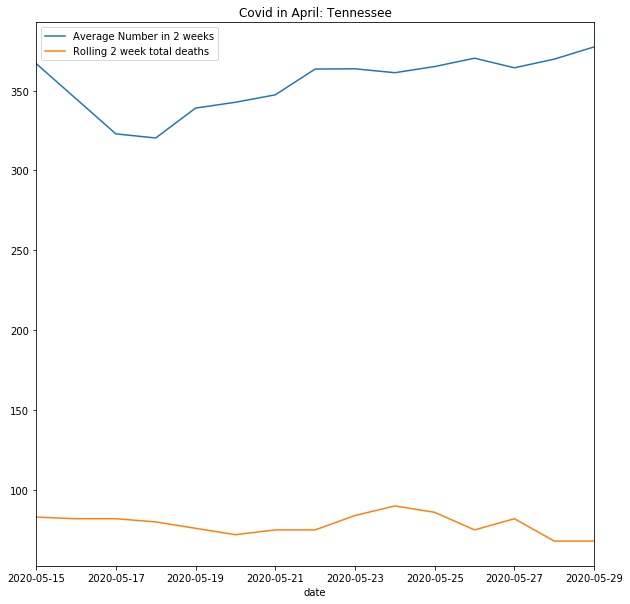

In [34]:
plot_covid_lag('Tennessee')

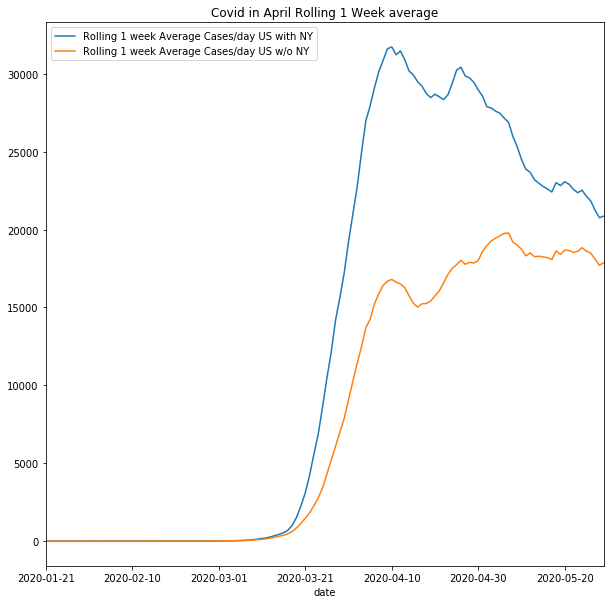

In [35]:
fig,ax = plt.subplots(figsize=(10,10))
(states_df.groupby('date')['cases_last_7'].sum()/7).plot(ax=ax,label="Rolling 1 week Average Cases/day US with NY")
(states_df.loc[~states_df['state'].isin(['New York','New Jersey','Massachusetts'])].groupby('date')['cases_last_7'].sum()/7).plot(ax=ax, label = "Rolling 1 week Average Cases/day US w/o NY")
ax.set_title("Covid in April Rolling 1 Week average")
ax.legend()

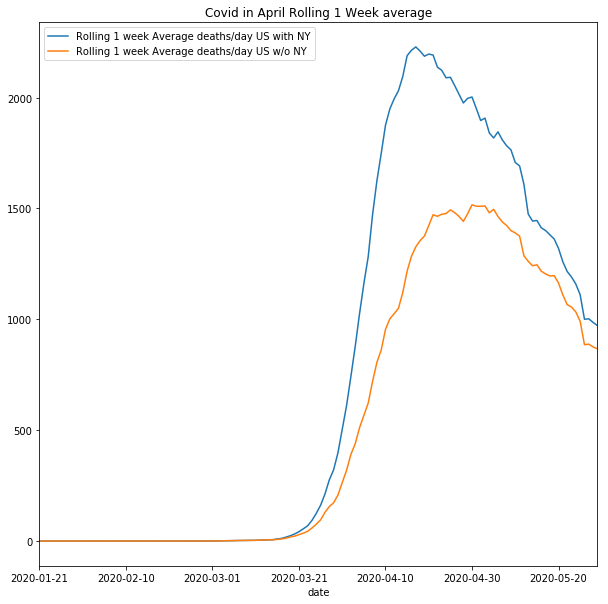

In [36]:
fig,ax = plt.subplots(figsize=(10,10))
(states_df.groupby('date')['deaths_last_7'].sum()/7).plot(ax=ax,label="Rolling 1 week Average deaths/day US with NY")
(states_df.loc[states_df['state']!='New York'].groupby('date')['deaths_last_7'].sum()/7).plot(ax=ax, label = "Rolling 1 week Average deaths/day US w/o NY")
ax.set_title("Covid in April Rolling 1 Week average")
ax.legend()

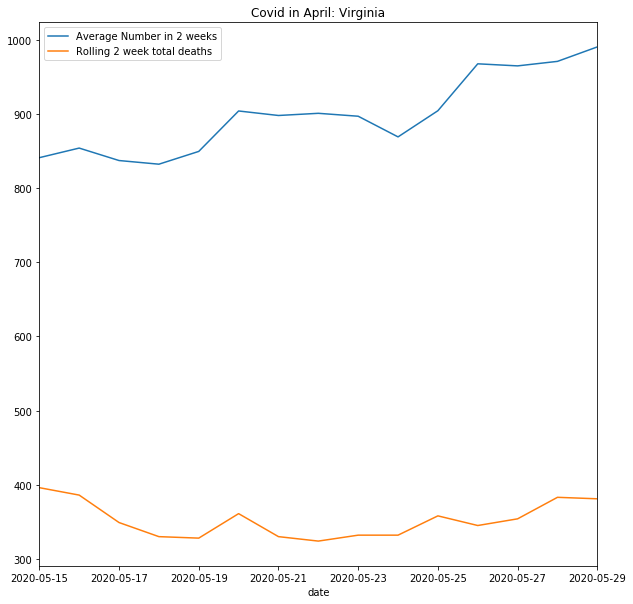

In [37]:
plot_covid_lag('Virginia')

In [38]:
fips_df = pd.read_csv('https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-counties.csv')

In [39]:
us_df.shape, fips_df.shape, states_df.shape

((130, 5), (188631, 6), (4854, 11))

In [40]:
states_df['cases'].max()

373108